<a href="https://colab.research.google.com/github/chahipatel/heart-disease-prediction/blob/main/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Exploratory Data Analysis**

In [11]:
ds = pd.read_csv("heart.csv")

In [12]:
ds.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
ds.shape

(918, 12)

In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [16]:
ds.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [17]:
ds.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


**Data Cleaning**

In [18]:
ds.duplicated().sum()

np.int64(0)

In [19]:
ds.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


**Data Preprocessing**

In [24]:
ds_cleaned = pd.get_dummies(ds,drop_first=True)


In [25]:
ds_cleaned

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [26]:
ds_cleaned = ds_cleaned.astype(int)

In [27]:
ds_cleaned

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [30]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
ds_cleaned[numerical_cols] = scaler.fit_transform(ds_cleaned[numerical_cols])
ds_cleaned.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.302825,0.139040,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [31]:
ds_cleaned.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

**Feature Engineering**

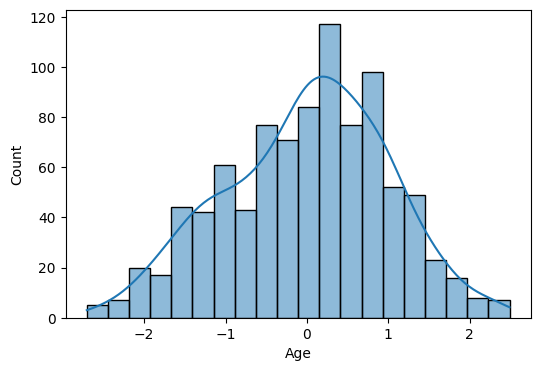

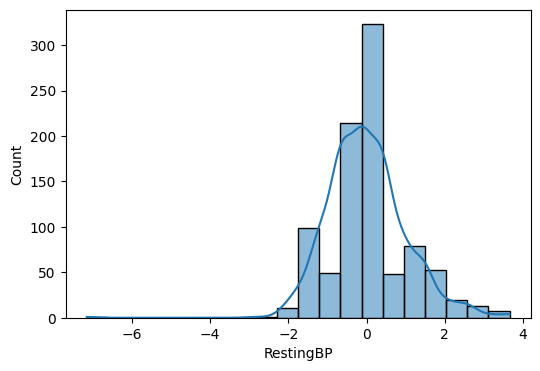

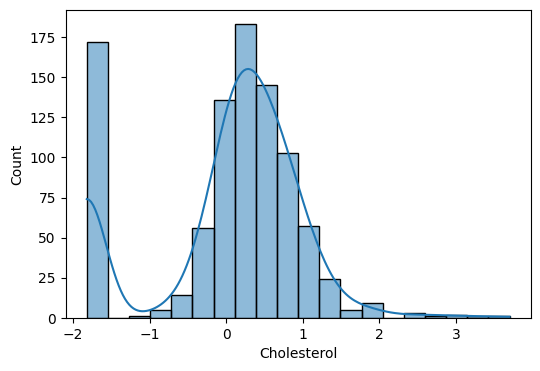

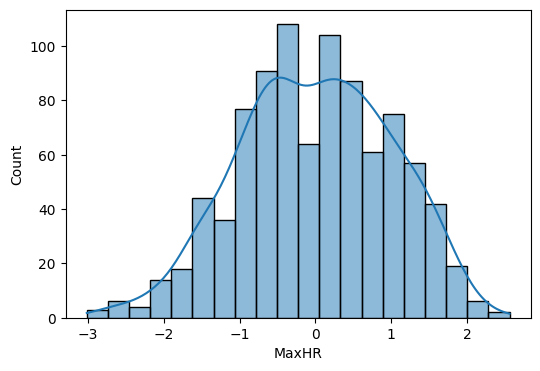

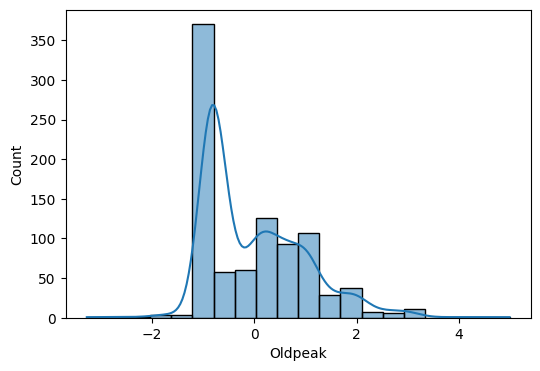

In [39]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(ds[col],kde = True,bins = 20)

<Axes: xlabel='Sex', ylabel='count'>

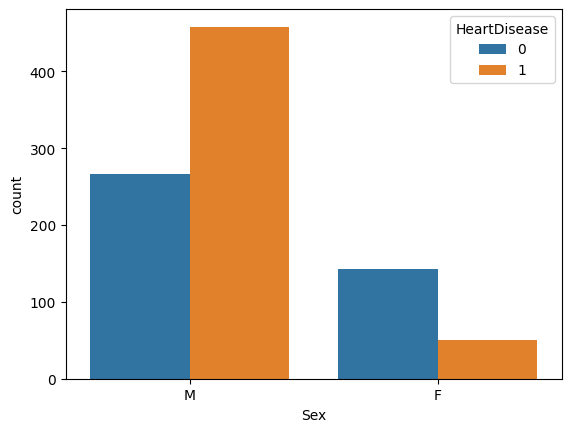

In [53]:
sns.countplot(x = ds['Sex'],hue = ds['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

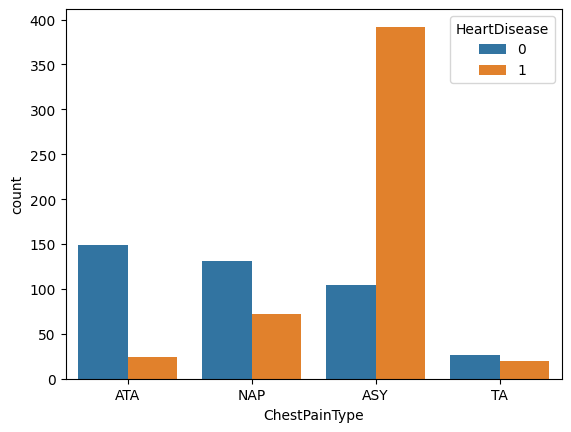

In [54]:
sns.countplot(x = ds['ChestPainType'],hue = ds['HeartDisease'])

<Axes: xlabel='RestingECG', ylabel='count'>

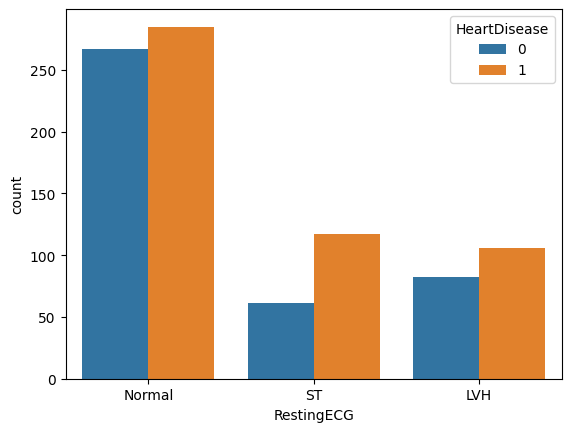

In [55]:
sns.countplot(x = ds['RestingECG'],hue = ds['HeartDisease'])

<Axes: xlabel='ExerciseAngina', ylabel='count'>

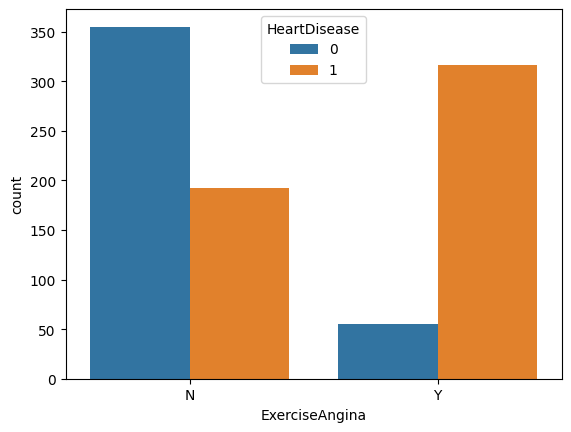

In [56]:
sns.countplot(x = ds['ExerciseAngina'],hue = ds['HeartDisease'])

<Axes: xlabel='ST_Slope', ylabel='count'>

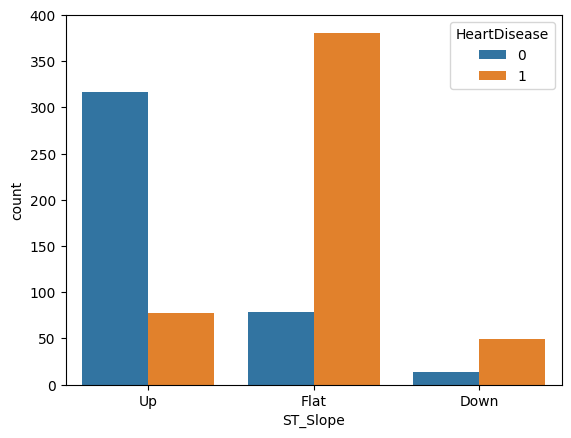

In [57]:
sns.countplot(x = ds['ST_Slope'],hue = ds['HeartDisease'])

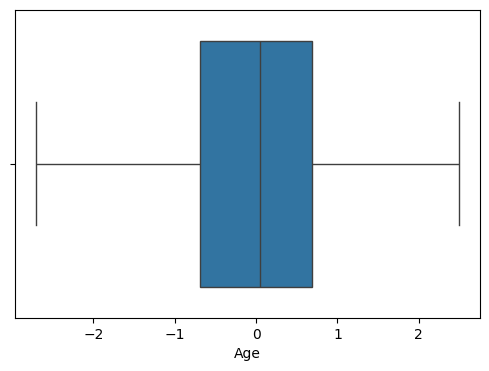

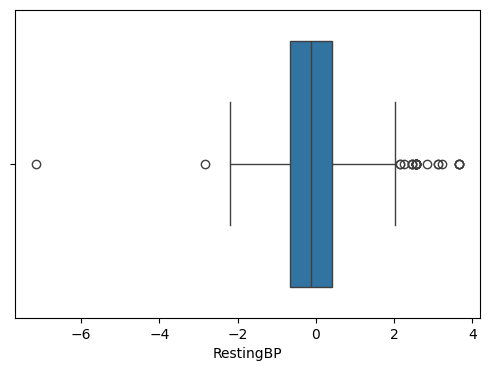

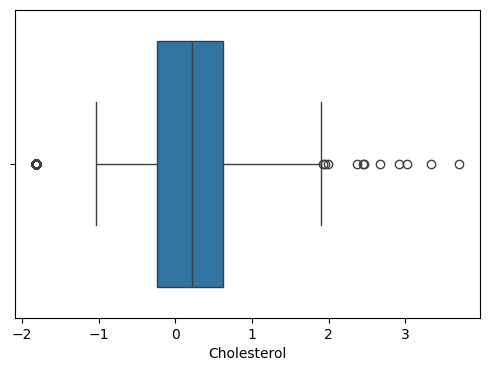

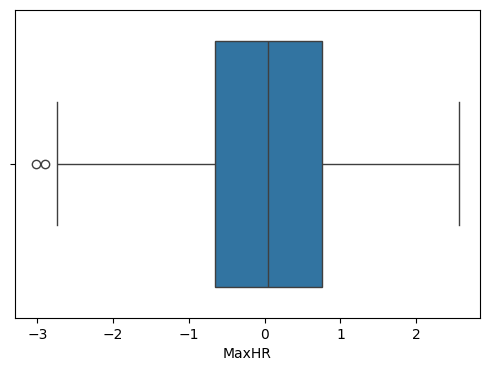

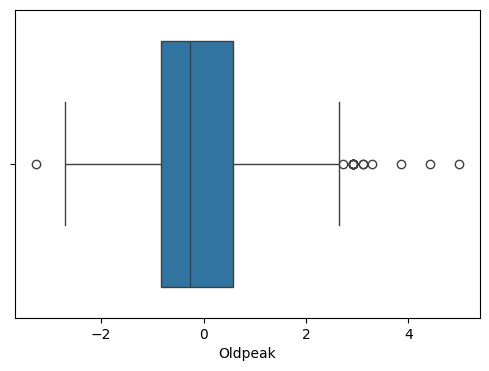

In [48]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=ds[col])


<Axes: xlabel='HeartDisease', ylabel='Age'>

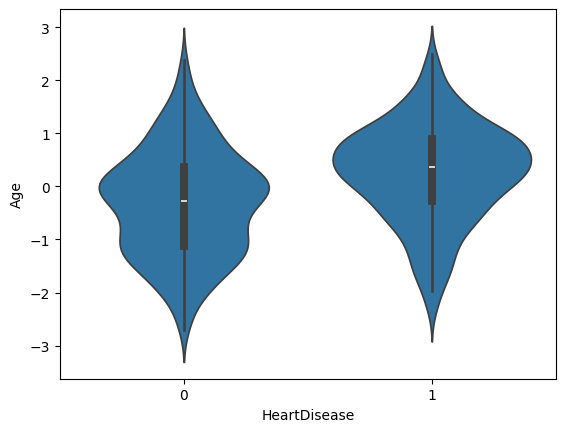

In [58]:
sns.violinplot(x='HeartDisease', y='Age', data=ds)

<Axes: >

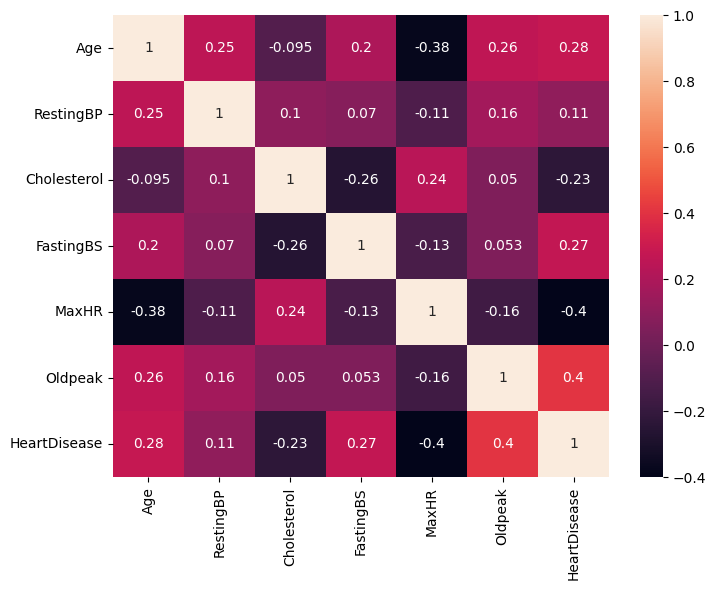

In [59]:
plt.figure(figsize=(8,6))
sns.heatmap(ds.corr(numeric_only=True),annot=True)

**Split The Dataset**

In [64]:
X = ds_cleaned.drop('HeartDisease', axis=1)
y = ds_cleaned['HeartDisease']

**Model Selection And Training**

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**1.Logistic Regression**

In [109]:
from sklearn.linear_model import LogisticRegression


In [110]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_pred = model.predict(X_test)

In [68]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

In [69]:
y_test

,HeartDisease
668,0
30,1
377,1
535,1
807,0
...,...
211,1
745,1
584,1
878,0


In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

In [71]:
accuracy_score(y_test,y_pred)

0.8532608695652174

In [72]:
confusion_matrix(y_test,y_pred)

array([[67, 10],
       [17, 90]])

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



**2.K-Nearest Neighbors (KNN)**

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn_model = KNeighborsClassifier(n_neighbors= 5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [80]:
y_pred_knn = knn_model.predict(X_test)

In [88]:
y_pred_knn

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

In [81]:
accuracy_score(y_test,y_pred_knn)

0.842391304347826

In [82]:
confusion_matrix(y_test,y_pred_knn)

array([[65, 12],
       [17, 90]])

In [83]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



**3.Gaussian Naive Bayes**

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
model_NB = GaussianNB()
model_NB.fit(X_train,y_train)

GaussianNB()

In [86]:
y_pred_NB = model_NB.predict(X_test)

In [87]:
y_pred_NB

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [89]:
accuracy_score(y_test,y_pred_NB)

0.8641304347826086

In [90]:
confusion_matrix(y_test,y_pred_NB)

array([[68,  9],
       [16, 91]])

In [91]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



**4.Decision Tree**

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [95]:
y_pred_DT = model_DT.predict(X_test)

In [96]:
y_pred_DT

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1])

In [97]:
accuracy_score(y_test,y_pred_DT)

0.8152173913043478

In [98]:
confusion_matrix(y_test,y_pred_DT)

array([[62, 15],
       [19, 88]])

In [99]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.77      0.81      0.78        77
           1       0.85      0.82      0.84       107

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



**5.Support Vector Machine**

In [100]:
from sklearn.svm import SVC

In [102]:
model_svm = SVC(kernel = 'linear')
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [104]:
y_pred_svc = model_svm.predict(X_test)

In [105]:
y_pred_svc

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

In [106]:
accuracy_score(y_test,y_pred_svc)

0.8586956521739131

In [107]:
confusion_matrix(y_test,y_pred_svc)

array([[67, 10],
       [16, 91]])

In [108]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

